# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [1]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [2]:
#Cargamos dataset a utilizar
car =  pd.read_csv('car_evaluation.csv')
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Análisis exploratorio de datos

In [3]:
#Visualizacion del dataframe
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
#Analizamos el shape del objeto
car.shape

(1727, 7)

In [5]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car.columns = col_names

In [6]:
#Verificamos la transformacion
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
#Visualizamos los tipos de datos
car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [8]:
# Exploremos un poco mas la variable target
car['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
#Verificamos valores missings
car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [10]:
#Separamos en X e y
from sklearn.model_selection import train_test_split
X = car.drop('class', axis=1)
y = car['class']

In [11]:
#Importamos las librerias necesarias para la creacion del modelo
#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#Veamos que obtuvimos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1208, 6), (519, 6), (1208,), (519,))

In [13]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


In [14]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [15]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import  category_encoders as ce

In [16]:
#Verificamos la transformacion
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']) #creamos el encoder
X_train = encoder.fit_transform(X_train) #aplicamos la transformacion
X_test = encoder.transform(X_test) #aplicamos la transformacion
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [17]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier
#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [18]:
#Entrenamiento
tree.fit(X_train, y_train) #entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [20]:
y_train_pred[:5]

array(['acc', 'acc', 'acc', 'acc', 'unacc'], dtype=object)

## Evaluación de modelo de clasificación con árbol de decisión

In [21]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
acc_train = accuracy_score(y_train, y_train_pred) #calculamos el accuracy
print('Train Accuracy: ', acc_train) #imprimimos el accuracy

#Calculo el accuracy en Test
acc_test = accuracy_score(y_test, y_test_pred) #calculamos el accuracy
print('Test Accuracy: ', acc_test) #imprimimos el accuracy

Train Accuracy:  0.7673841059602649
Test Accuracy:  0.8015414258188824


In [22]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred)) #imprimimos el reporte

              precision    recall  f1-score   support

         acc       0.53      1.00      0.70       118
        good       0.00      0.00      0.00        17
       unacc       1.00      0.83      0.90       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.80       519
   macro avg       0.38      0.46      0.40       519
weighted avg       0.82      0.80      0.79       519



/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [23]:
# matriz de  confusion
from sklearn.metrics import confusion_matrix
#Calculo la matriz de confusion en Train
confusion_train = confusion_matrix(y_train, y_train_pred) #calculamos la matriz de confusion
print('Train Confusion Matrix: \n', confusion_train) #imprimimos la matriz de confusion
#Calculo la matriz de confusion en Test
confusion_test = confusion_matrix(y_test, y_test_pred) #calculamos la matriz de confusion
print('Test Confusion Matrix: \n', confusion_test) #imprimimos la matriz de confusion

Train Confusion Matrix: 
 [[266   0   0   0]
 [ 52   0   0   0]
 [187   0 661   0]
 [ 42   0   0   0]]
Test Confusion Matrix: 
 [[118   0   0   0]
 [ 17   0   0   0]
 [ 63   0 298   0]
 [ 23   0   0   0]]


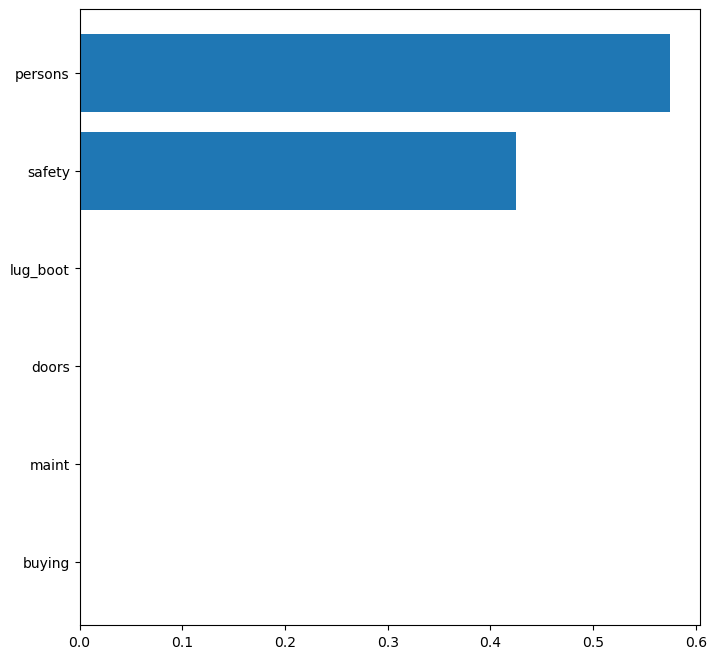

In [24]:
#Verificamos el feature importances
tree.feature_importances_ #obtenemos las importancias de las variables
#Visualizamos las importancias
pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=True).plot.barh(width=0.8, figsize=(8, 8))
plt.show()

/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


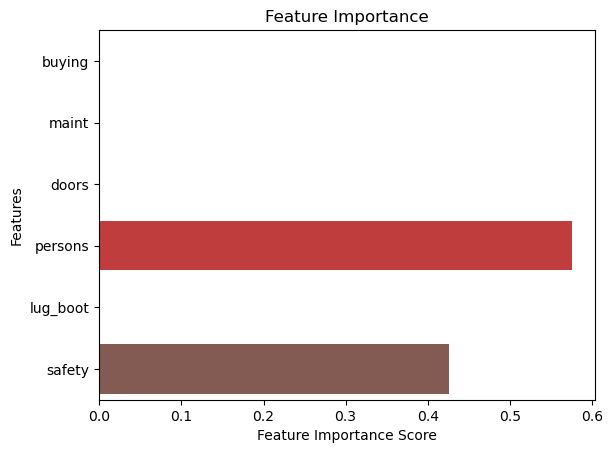

In [25]:
# con seaborn
sns.barplot(x=tree.feature_importances_, y=X_train.columns) #graficamos las importancias
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [26]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

In [34]:
#Calculo de las predicciones en Train y Test
rfc  = RandomForestClassifier(n_estimators=10, random_state=42) #creamos el modelo
rfc.fit(X_train, y_train) #entrenamos el modelo

RandomForestClassifier(n_estimators=10, random_state=42)

In [35]:
# predicciones
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test) #aplicamos la transformacion

## Evaluación de modelo de clasificación con random forest

In [36]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
acc_train = accuracy_score(y_train, y_train_pred) #calculamos el accuracy
print('Train Accuracy: ', acc_train) #imprimimos el accuracy

#Calculo el accuracy en Test
acc_test = accuracy_score(y_test, y_test_pred) #calculamos el accuracy
print('Test Accuracy: ', acc_test) #imprimimos el accuracy
#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

Train Accuracy:  0.9975165562913907
Test Accuracy:  0.8786127167630058


In [37]:
# Visualizacion de las feature importantes
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

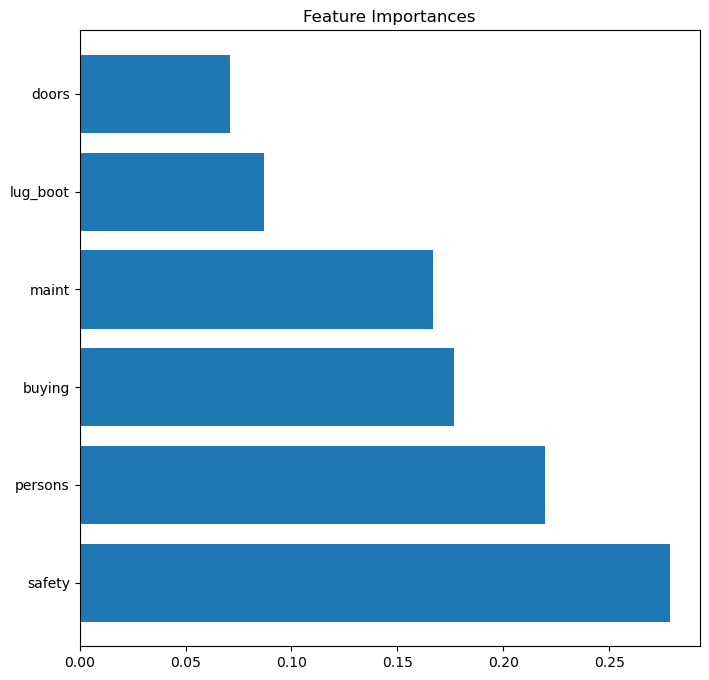

In [39]:
#Grafico de barras
feature_scores.plot.barh(width=0.8, figsize=(8, 8))
plt.title('Feature Importances')
plt.show()

In [32]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

In [44]:
# graph of conufsion matrix
cm  = confusion_matrix(y_test, y_test_pred)
print( 'Confusion matrix: \n', cm)

Confusion matrix: 
 [[101   2  13   2]
 [ 11   3   0   3]
 [ 13   0 348   0]
 [ 16   3   0   4]]


In [41]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred)) #imprimimos el reporte

              precision    recall  f1-score   support

         acc       0.72      0.86      0.78       118
        good       0.38      0.18      0.24        17
       unacc       0.96      0.96      0.96       361
       vgood       0.44      0.17      0.25        23

    accuracy                           0.88       519
   macro avg       0.62      0.54      0.56       519
weighted avg       0.87      0.88      0.87       519



Ha habido una mejora significativa usando Random Forest hasta 0.88 cambiando solamente el algoritmo.